In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import cython
import tweepy
import json
import requests
import inspect
import re

In [2]:
with open("dev_keys_json.json", "r") as f:
    keys = json.load(f)

{'API_key': 'e34sTfl23oytGMvlWUzK8fod2', 'API_secret_key': 'mNSjDDn94txcINviFg66I9RWCR1corWxQWBt70ePv3CWpNcsa4', 'Bearer_token': 'AAAAAAAAAAAAAAAAAAAAAPHiZgEAAAAATkGlyMoKFmk1lt6JIiZ77cdmSMc%3DbBchdrL7VAk9Pe0vHuJHdAFvUWC1vDg5M3o8ZyTaONVhwJsIiF'}


In [3]:

representatives_url = "https://en.wikipedia.org/wiki/List_of_current_members_of_the_United_States_House_of_Representatives"
table_class = "wikitable sortable plainrowheaders jquery-tablesorter"
response = requests.get(representatives_url)
print(response)

<Response [200]>


In [4]:
soup = BeautifulSoup(response.text, 'html.parser')
representatives_table=soup.find_all("table",{'class':"wikitable"})[5]

df_representatives=pd.read_html(str(representatives_table))
df_representatives=pd.DataFrame(df_representatives[0])
df_representatives

,District,Member,Party,Party.1,Prior experience,Education,Assumed office,Residence,Born[2]
0,Alabama 1,Jerry Carl,NaN,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,(age 63)
1,Alabama 2,Barry Moore,NaN,Republican,Alabama House of Representatives,Enterprise State Community College (AS)Auburn ...,2021,Enterprise,(age 55)
2,Alabama 3,Mike Rogers,NaN,Republican,Calhoun County CommissionerAlabama House of Re...,"Jacksonville State University (BA, MPA)Birming...",2003,Anniston[3],(age 63)
3,Alabama 4,Robert Aderholt,NaN,Republican,Haleyville Municipal Judge,University of North AlabamaBirmingham–Southern...,1997,Haleyville,(age 56)
4,Alabama 5,Mo Brooks,NaN,Republican,Alabama House of RepresentativesMadison County...,Duke University (BA)University of Alabama (JD),2011,Huntsville,(age 67)
...,...,...,...,...,...,...,...,...,...
430,Wisconsin 5,Scott Fitzgerald,NaN,Republican,Wisconsin State Senate,University of Wisconsin–Oshkosh (BS),2021,Clyman[95],(age 58)
431,Wisconsin 6,Glenn Grothman,NaN,Republican,Wisconsin SenateWisconsin State Assembly,"University of Wisconsin–Madison (BA, JD)",2015,Glenbeulah[96],(age 66)
432,Wisconsin 7,Tom Tiffany,NaN,Republican,Wisconsin SenateWisconsin State Assembly,University of Wisconsin–River Falls (BS),2020 (special),Minocqua,(age 64)
433,Wisconsin 8,Mike Gallagher,NaN,Republican,Political advisorU.S. Marine Corps,Princeton University (BA)National Intelligence...,2017,Green Bay,(age 37)


(array([211.,   0.,   0.,   0.,   0., 222.,   0.,   0.,   0.,   2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

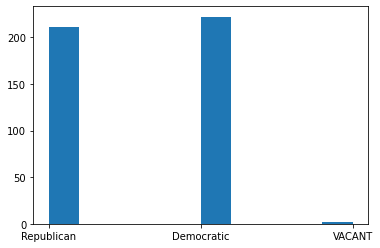

In [5]:
plt.hist(df_representatives["Party.1"])

(array([211.,   0.,   0.,   0.,   0., 222.,   0.,   0.,   0.,   2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

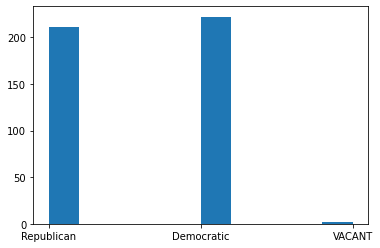

In [6]:
df_representatives["Name"] = df_representatives["Member"]
df_representatives["Party"] = df_representatives["Party.1"]
plt.hist(df_representatives["Party"])

In [7]:
senators_url = "https://en.wikipedia.org/wiki/List_of_current_United_States_senators"
table_class = "wikitable sortable jquery-tablesorter"
response = requests.get(senators_url)
print(response)

soup = BeautifulSoup(response.text, 'html.parser')
senators_table=soup.find_all("table",{'class':"wikitable"})[4]

df_senators=pd.read_html(str(senators_table))
df_senators=pd.DataFrame(df_senators[0])


<Response [200]>


In [8]:
df_senators["Party"] = df_senators["Party.1"]
df_senators["Party"][df_senators["Party.1"] == "Republican[d]"] = "Republican"
df_senators["Party"][df_senators["Party.1"] == "Independent[a]"] = "Independent"
df_senators["Name"] = df_senators["Senator"]

/var/folders/lx/p5f6tjxn78d7x0yr11l1pm_h0000gn/T/ipykernel_13109/2943347238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_senators["Party"][df_senators["Party.1"] == "Republican[d]"] = "Republican"
/var/folders/lx/p5f6tjxn78d7x0yr11l1pm_h0000gn/T/ipykernel_13109/2943347238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_senators["Party"][df_senators["Party.1"] == "Independent[a]"] = "Independent"


In [9]:
def strip_cols(dataframe, kept_cols):
    columns = list(dataframe.columns)
    for col in columns:
        if col not in kept_cols:
            del dataframe[col]
    return dataframe

In [10]:
df_senators["Branch"] = "Senate"
df_representatives["Branch"] = "House"

kept_cols = ["Name", "Party", "Branch"]

df_senators_stripped = strip_cols(df_senators, kept_cols)
df_representatives_stripped = strip_cols(df_representatives, kept_cols)

print(df_senators_stripped.shape)
print(df_representatives_stripped.shape)


(100, 3)
(435, 3)


In [11]:
politician_dataframe = pd.concat([df_senators_stripped, df_representatives_stripped])

(array([261.,   0.,   0., 270.,   0.,   0.,   2.,   0.,   0.,   2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

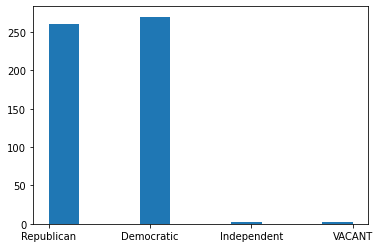

In [12]:
plt.hist(politician_dataframe["Party"])

In [21]:
client = tweepy.Client(bearer_token=keys["Bearer_token"],
                       access_token = keys["API_key"],
                       access_token_secret = keys["API_secret_key"],
                       wait_on_rate_limit=True)

def get_mentioned(tweets, split_name):
    mentioned = []
    
    #split_name = split_name + ["Sen", "sen", "Senator", "senator"]
    
    for i, tweet in enumerate(tweets):
        split = tweet["text"].split(' ')
        for s in split:
            if len(s) != 0:
                if s[0] == '@':
                    #for name_part in split_name:
                    if split_name[1] in s:
                        if split_name[0] in s:
                            if "Sen" in s or "sen" in s or "Senator" in s or "senator" in s:
                                clean_mention = re.sub(r'[^\w\s]', '', s)
                                mentioned.append(clean_mention)
                                break
                                
                            # else:
                            #     clean_mention = re.sub(r'[^\w\s]', '', s)
                            #     mentioned.append(clean_mention)
                                                
                        else:
                            if "Sen" in s or "sen" in s or "Senator" in s or "senator" in s:
                                clean_mention = re.sub(r'[^\w\s]', '', s)
                                mentioned.append(clean_mention)
                                break

                            else:
                                clean_mention = re.sub(r'[^\w\s]', '', s)
                                mentioned.append(clean_mention)
                        
    return mentioned

def score_match(match_list, mention):
    
    extras = ["Sen", "sen", "Senator", "senator", "Rep", "rep", "Representative", "representative"]
    
    #s = re.sub(" \d+", " ", s)
    
    score = 0
    try:
        if match_list[1] not in re.sub("\d+", "", mention):
            return score
    except:
        pass
    
    try:
        for item in match_list:
            if item in re.sub("\d+", "", mention):
                score += 1
    except:
        pass
            
    for item in extras:
        if item in re.sub("\d+", "", mention):
            score += 2

    return score/(len(match_list)+len(extras))
            

def get_mentioned_scoring(tweets, split_name):
    mentioned = []
    
    split_name = split_name
    scores = []
    
    
    for i, tweet in enumerate(tweets):
        split = tweet["text"].split(' ')
        for s in split:
            if len(s) != 0:
                if s[0] == '@':
                    
                    score = score_match(split_name, s)
                    scores.append(score)
                    
                    clean_mention = re.sub(r'[^\w\s\n]', '', s)
                    
                    mentioned.append(clean_mention)
                    
    return mentioned, scores

def get_twitter_username(name, client):
    
    tweets = client.search_recent_tweets(query = f'{name} is:verified', max_results = 100)[0]
    split_name = name.split(' ')
    
    mentioned = get_mentioned(tweets, split_name)
                            
    if len(mentioned) == 0:
        tweets = client.search_all_tweets(query = f'{name} is:verified', max_results = 100)[0]
        mentioned = get_mentioned(tweets, split_name)

    if len(mentioned) == 0:
        return 'FAILED'

    names, counts = np.unique(mentioned, return_counts = True)
    sort_inds = np.argsort(counts)[::-1]

    return names[0]

def get_twitter_username(name, client):
    
    tweets = client.search_recent_tweets(query = f'{name} is:verified', max_results = 100)[0]
    split_name = name.split(' ')
    
    mentioned = get_mentioned(tweets, split_name)
                            
    if len(mentioned) == 0:
        tweets = client.search_all_tweets(query = f'{name} is:verified', max_results = 100)[0]
        mentioned = get_mentioned(tweets, split_name)

    if len(mentioned) == 0:
        return 'FAILED'

    names, counts = np.unique(mentioned, return_counts = True)
    sort_inds = np.argsort(counts)[::-1]

    return names[0]

def get_twitter_usernames(names, branches, client):
    batch_size = 5
    
    n_batches = len(names) // batch_size
    
    output_usernames = []
    
    #pbar_outer = tqdm(total = n_batches, desc = "Batch number", position = 0)
    
    for i in tqdm(range(n_batches)):
        out_names = do_the_process(names[(i)*batch_size:(i+1)*batch_size],
                                  branches[(i)*batch_size:(i+1)*batch_size],
                                  client)
        
        output_usernames += out_names
        
        #tqdm.write(names[(i)*batch_size:(i+1)*batch_size][0])
        #tqdm.write(out_names[0])
        
        #pbar_outer.update(1)
    
    return output_usernames
    
    
    
def do_the_process(names, branches, client):
    
    query = ""
    for i, name in enumerate(names):
        query += name
        query += " OR "
        query += f"{name} {branches[i]}"
        if i != len(names) - 1:
            query += " OR "
    #print(len(query))
    tweets = []

    for tweet in tweepy.Paginator(client.search_recent_tweets, query = query,
                                  max_results=100).flatten(limit=len(names) * 500):
        tweets.append(tweet)
    
    #print(f"GOT TWEETS {len(tweets)}")
    
    names_output = []
    
    #pbar_inner = tqdm(total = len(names), desc = "Name in batch", position = 1)
    
    for name in names:
    
        split_name = name.split(' ')

        mentioned, scores = get_mentioned_scoring(tweets, split_name)
        
        ind_score_sort = np.argsort(scores)[::-1]
        ind_score_sort = ind_score_sort[:10]
        
        mentioned = np.array(mentioned)[ind_score_sort]
        scores    = np.array(scores)[ind_score_sort]
        
        
        if len(mentioned) == 0:
            names_output.append("FAILED")
            continue
        
        #print(mentioned)
        #screen_names = client.get_users(usernames = mentioned)
        
        for i, mention in enumerate(mentioned):
            #user = screen_names[i]
            #print(mention)
            try:
                user = client.get_user(username = mention)
            except:
                try:
                    mention = mention.split(' ')[0]
                    user = client.get_user(username = mention)
                except:
                    pass
            #print(mention)
            try:
                screen_name = user[0]["name"]
                if name in screen_name:
                    scores[i] += 10
                    #tqdm.write(user[0]["name"])
                    break
            except:
                pass
            #print(dir(user))

        score_indmax = np.argsort(scores)[-1]
        names_output.append(mentioned[score_indmax])
        
        #pbar_inner.update(1)

    return names_output


In [22]:
from tqdm.notebook import tqdm
politician_dataframe = politician_dataframe.sample(frac=1)
usernames = []
names = politician_dataframe["Name"].tolist()


In [23]:
usernames = get_twitter_usernames(names, politician_dataframe["Branch"].tolist(), client)
print(usernames)

    
politician_dataframe["Username"] = usernames
print(politician_dataframe.head())

  0%|          | 0/107 [00:00<?, ?it/s]

Rate limit exceeded. Sleeping for 658 seconds.
Rate limit exceeded. Sleeping for 716 seconds.
Rate limit exceeded. Sleeping for 727 seconds.
Rate limit exceeded. Sleeping for 704 seconds.
Rate limit exceeded. Sleeping for 730 seconds.
Rate limit exceeded. Sleeping for 717 seconds.
Rate limit exceeded. Sleeping for 736 seconds.
Rate limit exceeded. Sleeping for 723 seconds.


['PeteSessions', 'RepDebDingell', 'RepJayapal', 'RobWittman', 'KareemRifai', 'SenatorTester', 'LTBRpodcast', 'LTBRpodcast', 'SenatorRounds', 'RepJahanaHayes', 'RepSmucker', 'RepSmucker', 'RepSmucker', 'RepSmucker', 'RepSmucker', 'Mcpato111', 'Young__attorney', 'Mcpato111', 'Mcpato111', 'Mcpato111', 'SenDuckworth', 'RepSusieLee', 'RepRichardNeal', 'JesseKellyDC', 'SenWarren', 'RomaNoGreenPass', 'sjwarsap', 'sjwarsap', 'RepSteveChabot', 'sjwarsap', 'TheEmoDragon', 'TheEmoDragon', 'Rep_Clyde', 'TheEmoDragon', 'TheEmoDragon', 'TomReedNY23', 'maziehirono', 'maziehirono', 'RepPeteAguilar', 'RepKathleenRice', 'FearlessPAC', 'FearlessPAC', 'RepKClark', 'SenMarkKelly', 'NormaJTorres', 'RepPressley', 'canalplus', 'RepJimCosta', 'Armstrong_ND', 'RepGarbarino', 'PattyMurray', 'RepDanKildee', 'RepSaraJacobs', 'RepDelBene', 'Sbh08Mae', 'NotHoodlum', 'SenStabenow', 'NotHoodlum', 'RepRonnyJackson', 'RepJoeNeguse', 'GOP', 'SenJoniErnst', 'GOP', 'GOP', 'RepHorsford', 'SenatorTimScott', 'SenJohnHoeven', 

In [26]:
#politician_dataframe
extras = ["Sen", "sen", "Senator", "senator", "Rep", "rep", "Representative", "representative"]
for i, name in enumerate(names):
    matches = 0
    for extra in extras:
        if extra in usernames[i]:
            matches += 1
    if matches == 0:
        print(f'{name}         {usernames[i]}')
        

# listy = []

# for tweet in tweepy.Paginator(client.search_recent_tweets, query = "Donald Trump",
#                               max_results=100).flatten(limit=5000):
#     listy.append(tweet)

# print(list[:5])
# print(len(listy))

Pete Sessions         PeteSessions
Rob Wittman         RobWittman
Chellie Pingree         KareemRifai
Mary Gay Scanlon         LTBRpodcast
Sheila Cherfilus-McCormick         LTBRpodcast
Marcy Kaptur         Mcpato111
Don Young         Young__attorney
Tom Emmer         Mcpato111
Jim Inhofe         Mcpato111
Greg Murphy         Mcpato111
Trent Kelly         JesseKellyDC
Al Green         RomaNoGreenPass
Sheila Jackson Lee         sjwarsap
Marie Newman         sjwarsap
James Langevin         sjwarsap
Morgan Griffith         TheEmoDragon
David Rouzer         TheEmoDragon
Kathy Castor         TheEmoDragon
Alexandria Ocasio-Cortez         TheEmoDragon
Tom Reed         TomReedNY23
Mazie Hirono         maziehirono
Bob Latta         maziehirono
Neal Dunn         FearlessPAC
Brett Guthrie         FearlessPAC
Norma Torres         NormaJTorres
Bonnie Watson Coleman         canalplus
Kelly Armstrong         Armstrong_ND
Patty Murray         PattyMurray
William Timmons         Sbh08Mae
Nanette Barrag

In [28]:
politician_dataframe.to_csv("politicians", index = False)